In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import gensim.downloader as api
from project_data_preparation import project_data_preparation

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#nltk.download('stopwords')

In [3]:
#spacy.cli.download("en_core_web_sm")

In [4]:
wv = api.load('word2vec-google-news-300')

загрузим часть данных

In [5]:
df = pd.read_csv('data.csv', low_memory=False, skiprows=range(1, 5_000_000),nrows = 100_000)
df = df[['_id', 'text']]

обработаем созданной функцией

In [6]:
%%time
df['vector'] = df['text'].apply(lambda x: project_data_preparation(x, wv))

CPU times: total: 7min 17s
Wall time: 7min 18s


In [8]:
df

,_id,text,vector
0,5e8d90649fced0a24b5e244d,Fabrication of Dynamic Holograms on Polymer Su...,"[0.10227050632238388, 0.15795287489891052, 0.0..."
1,5e8d90649fced0a24b5e2476,Wavefront Control of 2D Curved Coding Metasurf...,"[-0.0350748710334301, -0.0474446602165699, 0.0..."
2,5e8d90649fced0a24b5e24dd,The Study on Internal Flow Characteristics of ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,5e8d90649fced0a24b5e250e,SoK of Used Cryptography in Blockchain. The un...,"[0.1048177108168602, -0.1150716170668602, 0.08..."
4,5e8d90649fced0a24b5e24cd,Iterative Multiuser Detection and Decoding for...,"[-0.00788225419819355, -0.1015101820230484, -0..."
...,...,...,...
99995,5f01a52c9fced0a24b5c726e,Jeremy Miller on Waterfall Versus Agile. Jerem...,"[0.067626953125, -0.076171875, -0.158325195312..."
99996,5f01a52c9fced0a24b5c726d,The Impact of Software on Eyecare in India. In...,"[-0.234375, -0.07177734375, 0.01055908203125, ..."
99997,5f01a52c9fced0a24b5c726a,"Conference Highlights: JIT Fault Prevention, M...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
99998,5f01a52c9fced0a24b5c726b,Expert Perspectives on AI. IEEE Software: With...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# 12 кластеров

In [44]:
%%time
num_class = 12
cur_model = KMeans(n_clusters=num_class, random_state=42).fit(pd.DataFrame(df['vector'].tolist()))

CPU times: total: 5min 16s
Wall time: 27.9 s


In [45]:
df['label'] = cur_model.labels_

In [46]:
for i in range(num_class):
    print ('%\nClaster_'+str(i)+f": {np.unique(cur_model.labels_, return_counts=True)[1][i]}")
    print(wv.similar_by_vector(cur_model.cluster_centers_[i], topn=10))
    for t in range(3):
        print(df[df['label'] == i]['text'].iloc[t])

%
Claster_0: 48989
[('iot', 0.8206873536109924), ('JeremyShockey_@', 0.7319536209106445), ('@_donlemoncnn_@', 0.704431414604187), ('hollyrpeete_@', 0.6942648887634277), ('dpa_fp', 0.6942231059074402), ('dpa_ry', 0.6921849846839905), ('dpa_cp', 0.6881505846977234), ('dpa_si', 0.6877887845039368), ('zac_efron', 0.6866549849510193), ('samantharonson_@', 0.6862229704856873)]
The Study on Internal Flow Characteristics of Magnetic Drive Pump. 
Improvement of the Prediction-Based Energy Efficient Ethernet Strategy. 
On Fault-Tolerant Control Systems: A Novel Reconfigurable and Adaptive Solution for Industrial Machines. 
%
Claster_1: 8467
[('inferential_statistics', 0.7241565585136414), ('Horses_previewed', 0.7050157189369202), ('impedance_measurements', 0.6927921175956726), ('mso_font_pitch', 0.6889780163764954), ('Descriptive_statistics', 0.6812208294868469), ('eigenvalues', 0.6795954704284668), ('fast_Fourier_transform', 0.6788074970245361), ('Gaussian_distribution', 0.6784235835075378), ('

[('algorithm', 0.8111080527305603), ('algorithms', 0.7505314946174622), ('simulated_annealing', 0.7316677570343018), ('fast_Fourier_transform', 0.7308883666992188), ('computational_algorithms', 0.7221982479095459), ('nondeterministic', 0.7212263345718384), ('deterministically', 0.7184264063835144), ('Bayesian_inference', 0.7179518342018127), ('inferential_statistics', 0.7155304551124573), ('computationally_efficient', 0.7122905850410461)]
PMT: Opposition-Based Learning Technique for Enhancing Meta-Heuristic Performance. Meta-heuristic algorithms have shown promising performance in solving sophisticated real-world optimization problems. Nevertheless, many meta-heuristic algorithms are still suffering from a low convergence rate because of the poor balance between exploration (i.e., roaming new potential search areas) and exploitation (i.e., exploiting the existing neighbors). In some complex problems, the convergence rate can still be poor owing to becoming trapped in local optima. Addr

[('By_Jonas_Elmerraji', 0.7225088477134705), ('By_Laurelle_Gilbert', 0.7209329605102539), ('%_#F########_9v.jsn', 0.705138623714447), ('%_#F########_3v.jsn', 0.7007171511650085), ('Visit_www.gelending.com_clnews', 0.696983277797699), ('BY_JEFF_KARN', 0.6929243206977844), ('Robo_signers_Mortgage', 0.6893128752708435), ('BY_CHERYL_LAVIN_cheryllavin@aol.com', 0.688281774520874), ('By_Elise_Viebeck', 0.6882104277610779), ('By_Miriam_Reimer', 0.6860339045524597)]
CNN-Based Health Model for Regular Health Factors Analysis in Internet-of-Medical Things Environment. Remote health monitoring applications with the advent of Internet of Things (IoT) technologies have changed traditional healthcare services. Additionally, in terms of personalized healthcare and disease prevention services, these depend primarily on the strategy used to derive knowledge from the analysis of lifestyle factors and activities. Through the use of intelligent data retrieval and classification models, it is possible to s

[('method', 0.6526501178741455), ('system', 0.6491220593452454), ('EGPS', 0.6429972648620605), ('stochastic_simulation', 0.6349622011184692), ('YMax_magicJack', 0.6337549090385437), ('called_U2B_R', 0.6320200562477112), ('impedance_measurements', 0.6260855197906494), ('inferential_statistics', 0.6248390078544617), ('parameterisation', 0.6182647347450256), ('Detecting_Conficker_infection', 0.6162822842597961)]
SoK of Used Cryptography in Blockchain. The underlying fundaments of blockchain are cryptography and cryptographic concepts that provide reliable and secure decentralized solutions. Although many recent papers study the use-cases of blockchain in different industrial areas, such as finance, health care, legal relations, IoT, information security, and consensus building systems, only few studies scrutinize the cryptographic concepts used in blockchain. To the best of our knowledge, there is no Systematization of Knowledge (SoK) that gives a complete picture of the existing cryptogr

[('DNA_methylation_patterns', 0.7695291638374329), ('phenotypic_expression', 0.7571082711219788), ('lung_epithelium', 0.7535109519958496), ('autoregulation', 0.7392333745956421), ('plexiform', 0.7379157543182373), ('chromosomal_mutations', 0.7369968295097351), ('molecular_abnormalities', 0.7344119548797607), ('visuomotor', 0.7326014637947083), ('cyclic_AMP_cAMP', 0.732581377029419), ('transgene_expression', 0.7291722297668457)]
Progressive Improved Convolutional Neural Network for Avionics Fault Diagnosis. Among deep learning methods, convolutional neural networks (CNNs) are able to extract features automatically and have increasingly been used in intelligent fault diagnosis studies. However, studies seldomly concentrate on the weakness associated with a highly imbalanced distribution of fault types due to different failure rates and when multiple faults are easily confused with single faults. To solve these problems, this paper developed a stochastic discrete-time series deep convolut

In [47]:
arr=np.array(cur_model.cluster_centers_)
dist_matrix = np.zeros((num_class, num_class))
for i in range(num_class):
    for j in range(num_class):
        dist_matrix[i,j] = np.linalg.norm(arr[i]-arr[j])

<AxesSubplot: >

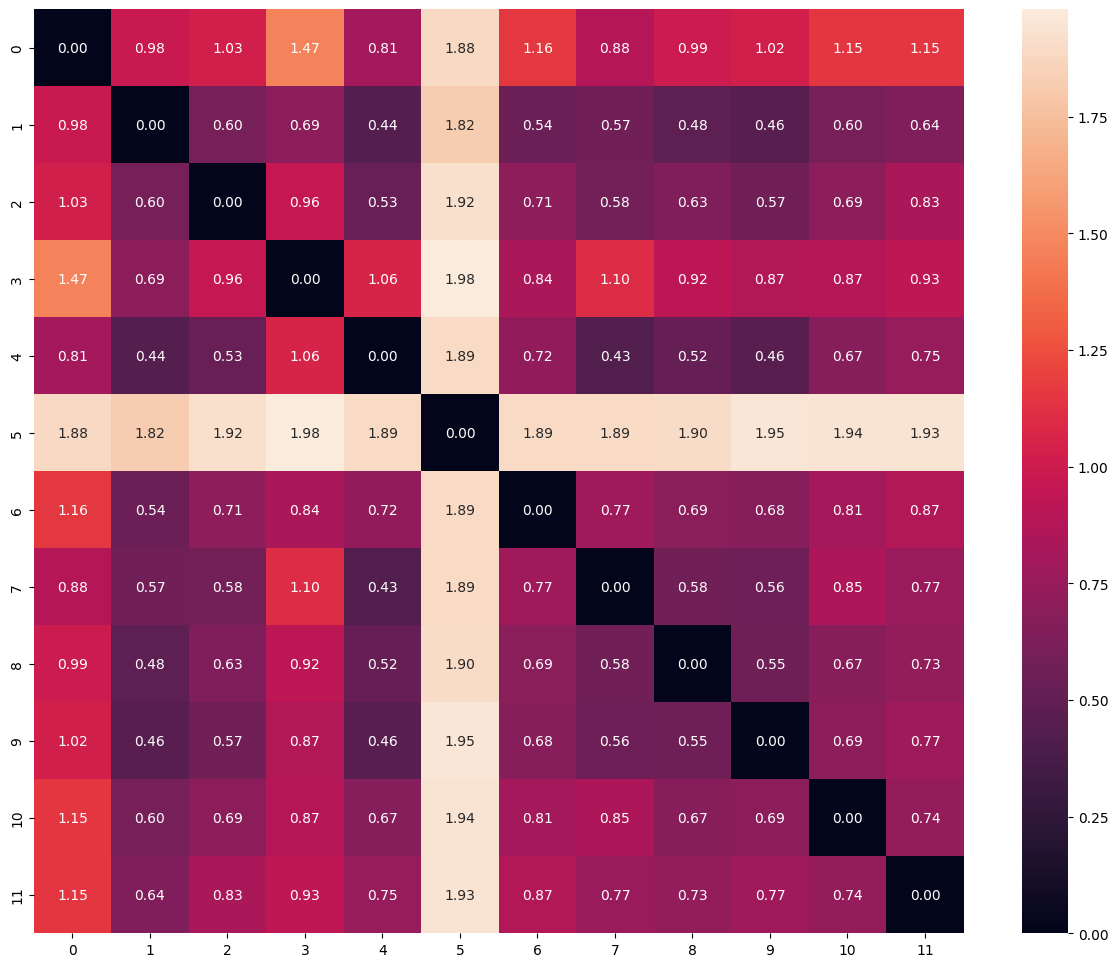

In [48]:
plt.subplots(figsize=(15,12))
sns.heatmap(dist_matrix, annot=True, fmt='.2f')

In [49]:
df[['_id', 'label']].to_csv('12.csv', index=False)